<a href="https://colab.research.google.com/github/shreya180902/SVM-RBF-Iris/blob/main/SVM_with_RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np

In [54]:
import pandas as pd

In [55]:
pip install scikit-learn

In [56]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [57]:
iris = load_iris()
x = iris.data
y = iris.target

In [58]:
df = pd.DataFrame(x, columns =iris.feature_names)
df['target'] = y
print(df.head(15))

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4 

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [60]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'gamma':[0.0001, 0.001, 0.01, 1, 10, 100, 1000]}


svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm,
                           param_grid,
                           cv=3,
                           n_jobs=-1)

In [63]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 1, 10, 100, 1000]})

In [64]:
print(
    "Best parameters are {} \nScore : {}%".format(
        grid_search.best_params_, grid_search.best_score_*100)
)

Best parameters are {'C': 10, 'gamma': 0.01} 
Score : 96.66666666666667%


In [65]:
scores = grid_search.cv_results_["mean_test_score"].reshape(
    len(param_grid['gamma']),
    len(param_grid['C']))


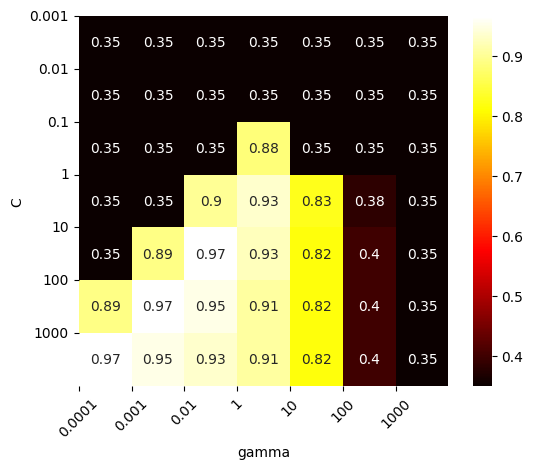

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(scores,
            cmap = plt.cm.hot,
            annot= True,
            cbar= True,
            square=True)
plt.xlabel("gamma")
plt.ylabel("C")
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'], rotation=0)
plt.show()

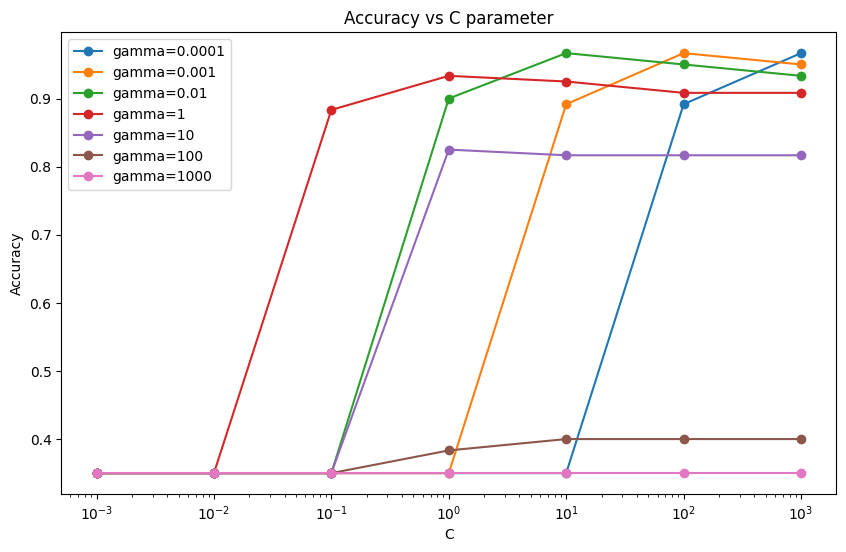

In [67]:
plt.figure(figsize=(10, 6))
plt.title("Accuracy vs C parameter")
plt.xlabel("C")
plt.ylabel("Accuracy")
n = len(param_grid['C'])
for i in range(n):
    plt.plot(param_grid['C'],
             scores[:,i],
             'o-', label='gamma='+str(param_grid['gamma'][i]))

plt.legend()
plt.xscale('log')
plt.show()

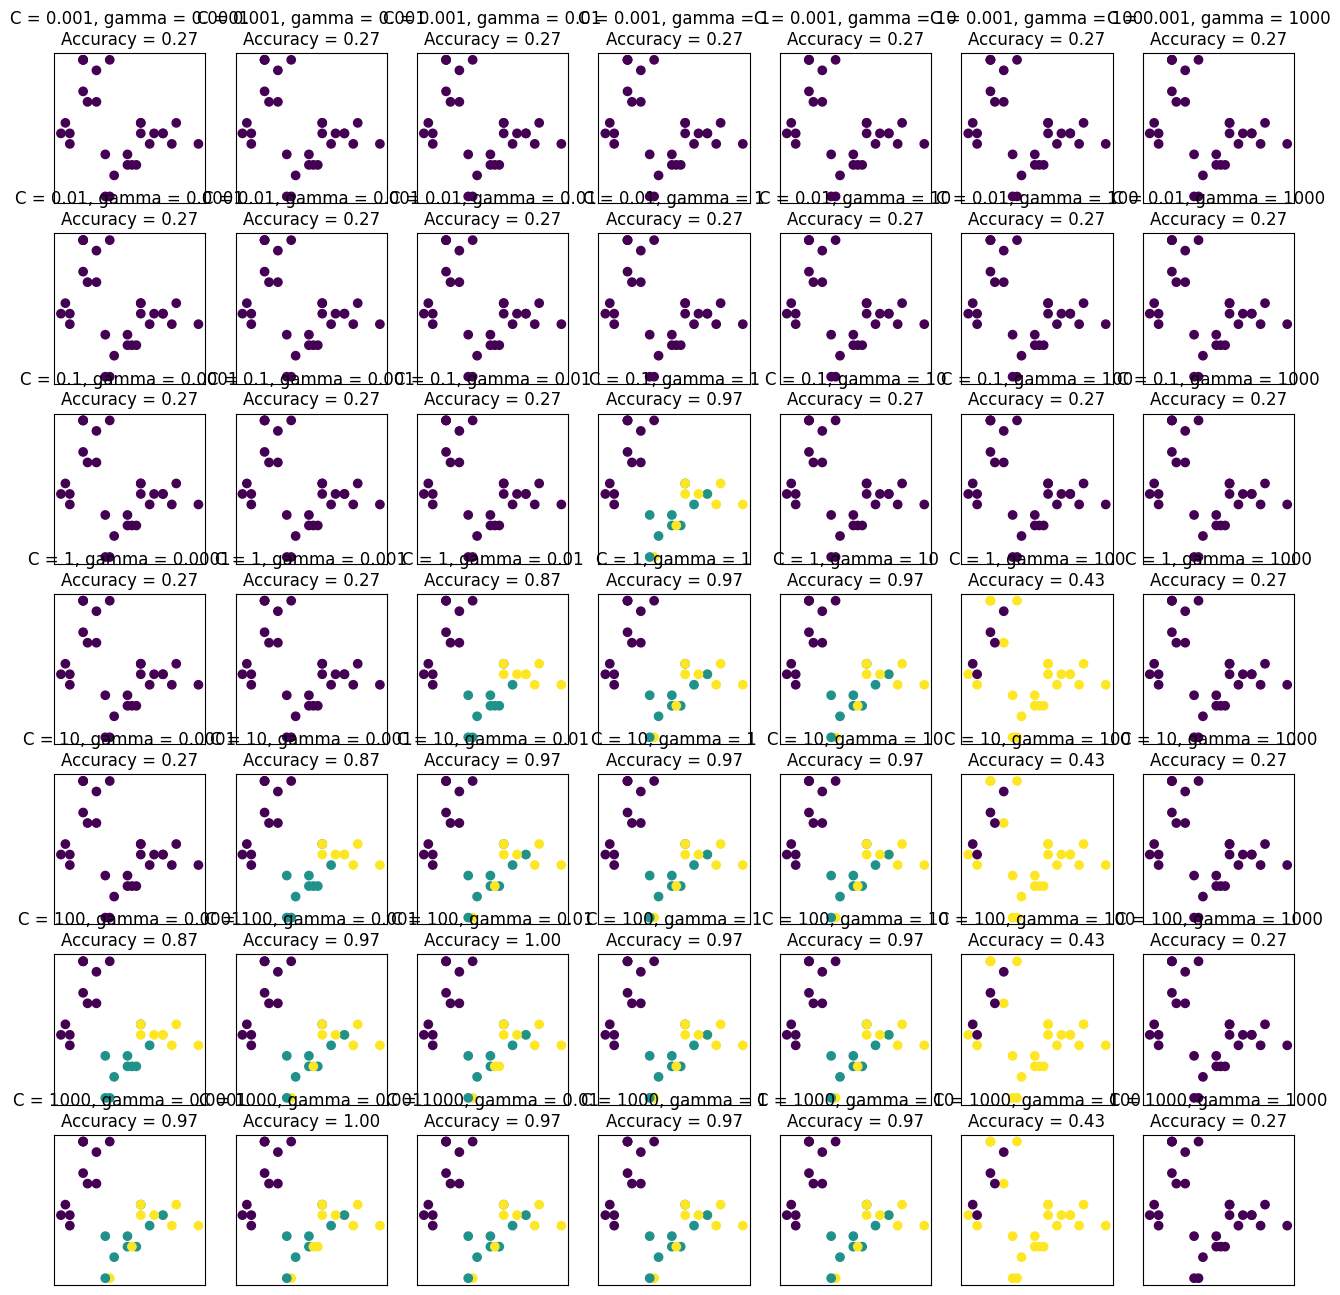

In [68]:
fig, axs = plt.subplots(len(param_grid['C']),
                        len(param_grid['gamma']),
                        figsize=(16,16),
                        sharey=True)
for i, C in enumerate(param_grid['C']):
    for j, gamma in enumerate(param_grid['gamma']):
        clf = SVC(kernel='rbf', C=C, gamma=gamma)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        axs[i,j].scatter(x_test[:,0], x_test[:,1], c=y_pred)
        axs[i,j].set_xticks(())
        axs[i,j].set_yticks(())
        axs[i,j].set_title('C = {}, gamma = {}\nAccuracy = {:.2f}'.format(
            C, gamma, accuracy))

plt.show()

In [69]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.27      1.00      0.42         8
           2       0.00      0.00      0.00        10

    accuracy                           0.27        30
   macro avg       0.09      0.33      0.14        30
weighted avg       0.07      0.27      0.11        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
